<a href="https://colab.research.google.com/github/FrancescoCortopassi/copilot-codespaces-vscode/blob/main/LEZIONE_48_to_55.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SCAPLING TRADING STRATEGY: Costruiamo ed implementiamo una strategia di scalping in M1

In [172]:
#Istallare i programmi necessari
!pip install yfinance
!pip install mpl_finance
!pip install ta

In [173]:
#importare le librerie
import pandas as pd
import yfinance as yf
from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import numpy as np
import ta
import warnings
warnings.filterwarnings("ignore")

In [174]:
from matplotlib import cycler
colors= cycler('color',
               ['#669FEE','#66EE91','#9988DD',
                '#EECC55','#88BB44','#FFBBBB'])
plt.rc('figure',facecolor='#313233')
plt.rc('axes',facecolor='#313233',edgecolor='none',
       axisbelow=True,grid=True,prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid',color='474A4A',linestyle='solid')
plt.rc('xtick',color='gray')
plt.rc('ytick',direction='out',color='gray')
plt.rc('legend',facecolor='#313233',edgecolor='#313233')
plt.rc('text',color='C9C9C9')
plt.rcParams['figure.figsize']=[20,8]


In [175]:
#Importare il prezzo delle stocks
df= yf.download("EURUSD=X", start= "2010-01-01")

#Creare una Date Column per plottare i Candlestick in seguito
df["Date"]= pd.to_datetime(df.index)
df["Date"]= df["Date"].apply(mpl_dates.date2num)

#Inizializzare titolo ed indice
df.index.name="time"
df.columns= ["open","high","low","close","volume","date"]
df

[*********************100%***********************]  1 of 1 completed


,open,high,low,close,volume,date
time,,,,,,
2010-01-01,1.438994,1.440196,1.432706,1.432706,0,14610.0
2010-01-04,1.442398,1.445191,1.426208,1.431004,0,14613.0
2010-01-05,1.436596,1.448310,1.435194,1.442710,0,14614.0
2010-01-06,1.440403,1.443460,1.429123,1.436596,0,14615.0
2010-01-07,1.431803,1.444481,1.430206,1.440300,0,14616.0
...,...,...,...,...,...,...
2025-01-24,1.041602,1.051934,1.041320,1.041602,0,20112.0
2025-01-27,1.046759,1.053375,1.045435,1.046759,0,20115.0
2025-01-28,1.044506,1.045577,1.041526,1.044506,0,20116.0


In [176]:
#Creare due colonne vuote per supporto e resistenza
df["support"]= np.nan
df["resistance"]= np.nan

#Creare il supporto: come spiega nel corso ci sono differenti modi di creare supporti e resistenze
#(moving average, bollinger bands, altro). Io adesso implementerò il metodo che viene suggerito nel
#corso

df.loc[(df["low"].shift(5)> df["low"].shift(4))&
       (df["low"].shift(4)> df["low"].shift(3))&
       (df["low"].shift(3)> df["low"].shift(2))&
       (df["low"].shift(2)> df["low"].shift(1))&
       (df["low"].shift(1)> df["low"].shift(0)), "support"]= df["low"]

#Stessa cosa per la resistenza
df.loc[(df["high"].shift(5)< df["high"].shift(4))&
       (df["high"].shift(4)< df["high"].shift(3))&
       (df["high"].shift(3)< df["high"].shift(2))&
       (df["high"].shift(2)< df["high"].shift(1))&
       (df["high"].shift(1)< df["high"].shift(0)), "resistance"]= df["high"]

df_bis = df.loc["2019"]

#SPIEGAZIONE del CODICE: Utilizzando la funzione LOC chiediamo al DataFrame di segnalare 5 aumenti consecutivi
#(candela giornalieria) per definire una linea di supporto. Stesso principio con senso inverso per la linea di resistenza

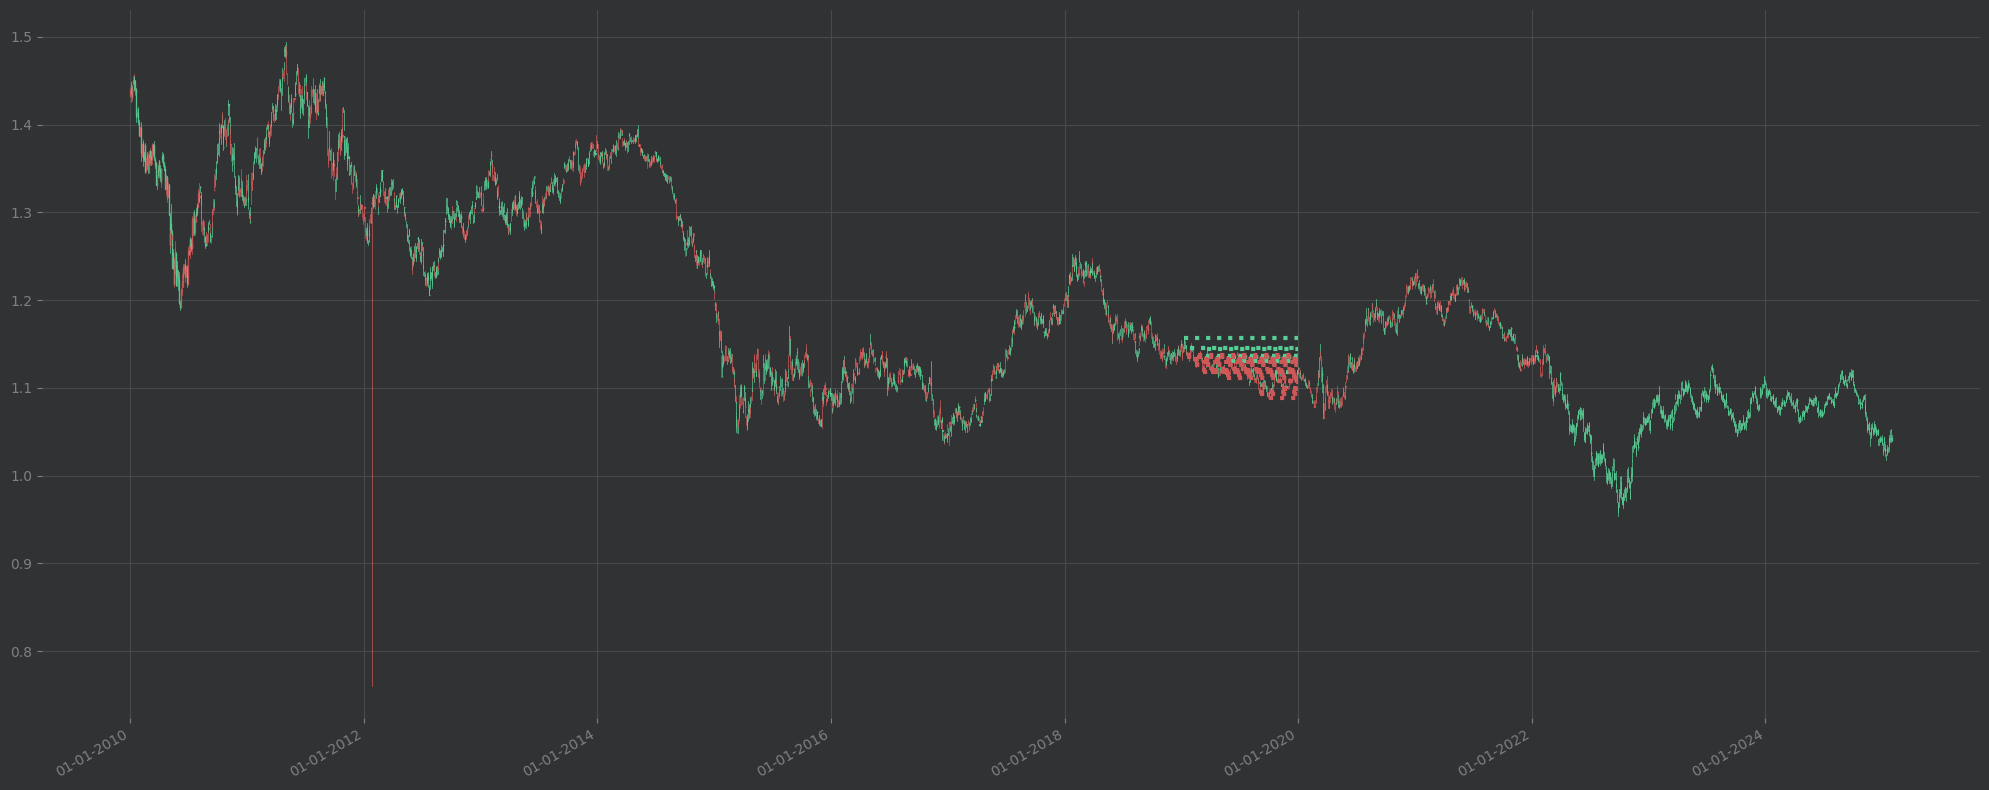

In [177]:
#Adesso passiamo al plottaggio del grafico
fig,ax=plt.subplots()#non comprendo questa parte di codice. DA VERIFICARE!!!

#Plottare le CANDLESTICKS
candlestick_ohlc(ax, df[["date","open","high","low","close"]].values, width=0.6,\
                 colorup="#57CE95", colordown="#CE5757",alpha=0.8)
#Inserire le date sull' axis X
date_format= mpl_dates.DateFormatter("%d-%m-%Y")
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()

#Plottare le linee di supporto e resistenza
for resistance, date in zip (df_bis["resistance"].dropna(), df_bis["resistance"].dropna().index):
  plt.hlines(resistance,xmin=date, xmax=df_bis.index[-1],color="#57CE95", linestyle=":", linewidth=3)

for support, date in zip(df_bis["support"].dropna(), df_bis["support"].dropna().index):
  plt.hlines(support,xmin=date, xmax=df_bis.index[-1],color="#CE5757", linestyle=":", linewidth=3 )



fig.show()



IMPORTANTE: Per creare una STRATEGIA dobbiamo sempre utilizzare i dati del broker, e non quelli di Yfinance. nel mio caso, mi dovrò sempre riferire al broker di MT5. Il motivo è la decentralizzazione del maercato FOREX, per cui utilizzare differenti broker significa automaticamente avere dati diversi.
Nel corso utilizziamo Yfinance per importare le strategie perché è semplice da implementare.

In [178]:
#Plottare con il metodo FILLNA per avere linee di supporto e resistenza pulite e comprensibili

LEZIONE 50: SUPPORT_&_RESISTANCE

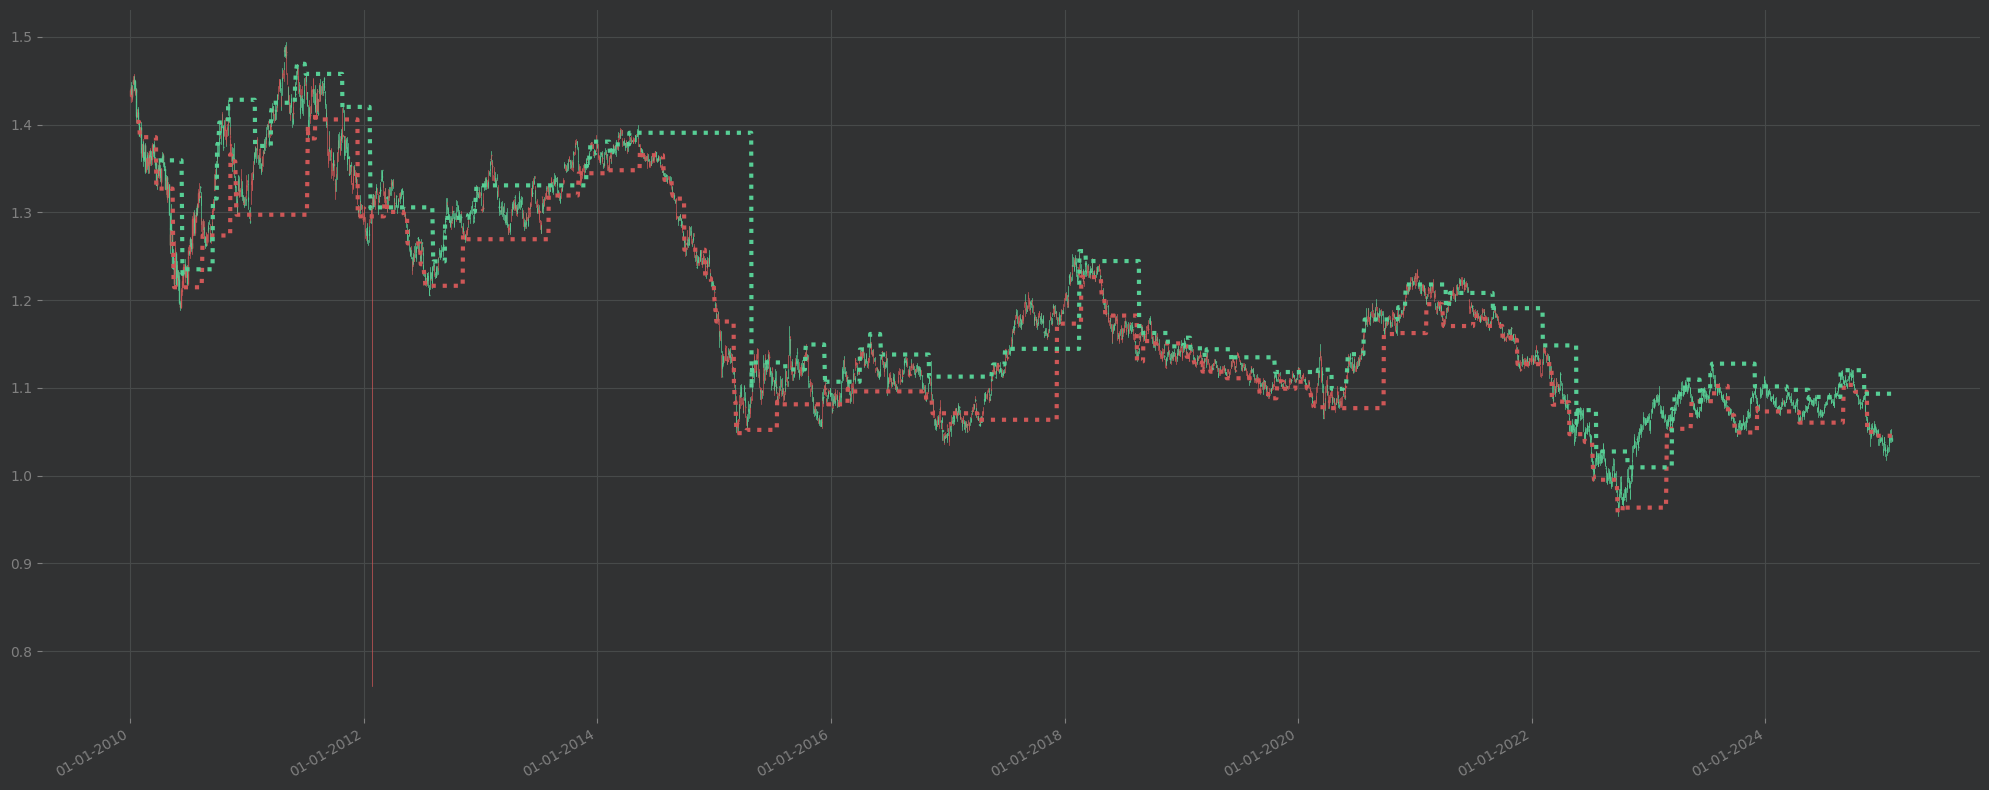

In [179]:
df_bis = df[df.index == 2019]
#Adesso passiamo al plottaggio del grafico
fig, ax = plt.subplots()#non comprendo questa parte di codice. DA VERIFICARE!!!

#Plottare le CANDLESTICKS
candlestick_ohlc(ax, df[["date","open","high","low","close"]].values, width=0.6,\
                 colorup="#57CE95", colordown="#CE5757",alpha=0.8)
#Inserire le date sull' axis X
date_format= mpl_dates.DateFormatter("%d-%m-%Y")
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()

#Plottare le linee di supporto con il metodo fillna()
plt.plot(df["support"].fillna(method="ffill"),color="#CE5757", linestyle=":", linewidth=3)

#Plottare le linee di resistenza con il metodo fillna()
plt.plot(df["resistance"].fillna(method="ffill"),color="#57CE95", linestyle=":", linewidth=3)

In [ ]:
df_bis = df[df.index.year == 2019]
df_bis = df.loc["2019"]

LEZIONE_51: IMPLEMENTAZIONE DELLA STRATEGIA (supporti e resistenze)

IMPORTANTE: Qeusta strategia di SUPPORTO & RESISTENZA non è adatta per il forex, perché ci troviamo in un mercato di DATI STAZIONARI: dopo ogni rottura il prezzo si muove con molti ritracciamenti e a differenza di stocks come GOOGLE o APPLE, non ci sono spesso movimenti importanti di direzione(in realtà ci sono anche nel forex, ma sono probabilmente meno netti)

Non funziona soprattutto con il DAYLY TM

In [219]:
#Definiamo supporti e resistenze nella nostra strategia
df["signal"]= 0
df["smooth resistance"]= df["resistance"].fillna(method="ffill")
df["smooth support"]= df["support"].fillna(method="ffill")

#Creaiamo la condizione BUY
condition_1_buy=(df["close"].shift(1)< df["smooth resistance"].shift(1)) &\
                (df["smooth resistance"]*(1+0.0/100)< df['close'])

#Creaiamo la condizione SELL
condition_2_sell=(df["close"].shift(1)> df["smooth support"].shift(1)) &\
                 (df["smooth support"]*(1-0.0/100)> df['close'])

#Piazziamo il segnale
df.loc["condition1_buy", "signal"]= 1
df.loc["condition2_sell", "signal"]=-1



In [225]:
#Creaiamo il DataFrame con l'asset
df= yf.download ("USDJPY=X")
df.columns= ["open","high","low","close","volume"]
df

[*********************100%***********************]  1 of 1 completed


,open,high,low,close,volume
Date,,,,,
1996-10-30,114.180000,114.480003,113.610001,114.370003,0
1996-11-01,113.500000,113.500000,113.500000,113.500000,0
1996-11-04,113.879997,113.980003,112.949997,113.279999,0
1996-11-05,114.250000,114.330002,113.449997,113.709999,0
1996-11-06,113.949997,114.680000,113.650002,114.230003,0
...,...,...,...,...,...
2025-01-23,156.440002,156.746994,155.873993,156.440002,0
2025-01-24,156.154999,156.567993,154.862000,156.154999,0
2025-01-27,155.744003,156.225998,153.725006,155.744003,0


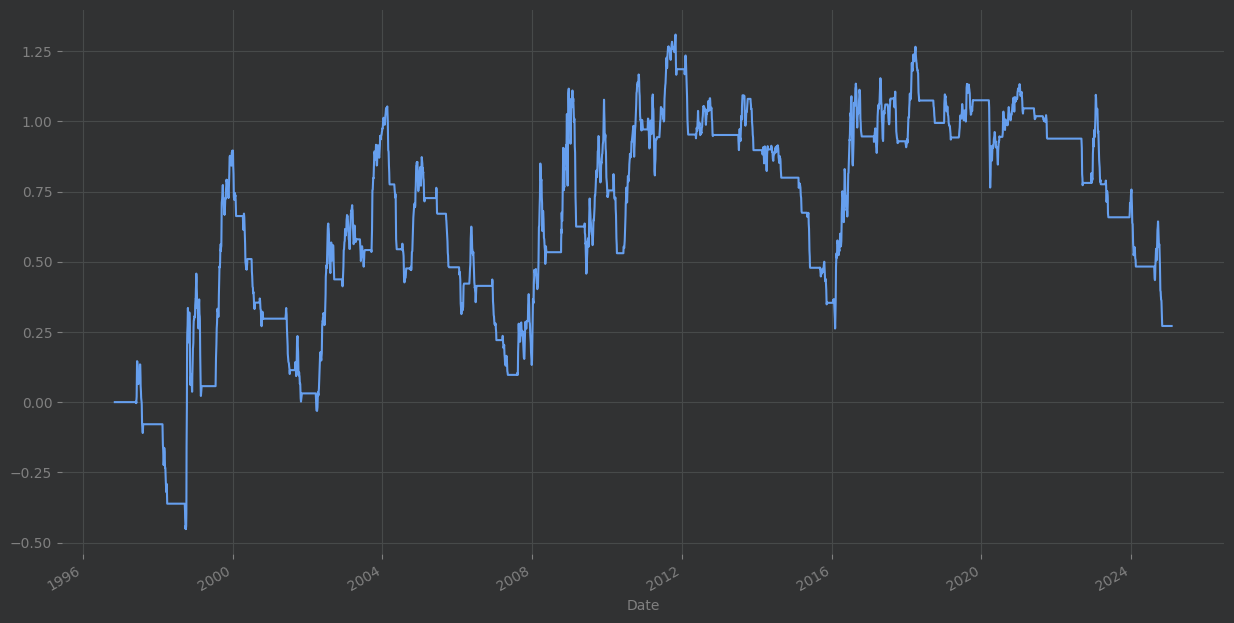

In [226]:
df["SMA_fast"] =  df["close"].rolling(30).mean()

df["SMA_slow"] = df["close"].rolling(60).mean()

condition_2_buy= df["SMA_fast"]> df["SMA_slow"]
condition_2_sell= df["SMA_fast"]< df["SMA_slow"]

#Definiamo le condizioni di ingresso

df["signal"]=0
df.loc[condition_1_buy & condition_2_buy, "signal"]= 1
df.loc[condition_2_sell & condition_2_sell, "signal"]=-1

#calcoliamo la percentuale sulla varianza dell'asset
df["pct"]=df["close"].pct_change (1)

#Calcoliamo il ritorno della strategia
df["return"]=np.array([df["pct"].shift(i) for i in range(duration)]).sum (axis=0) * (df["signal"].shift(duration))

#ALTRO CODICE:     df["pct"].shift(0)+df["pct"].shift(1)*df["signal"].shift(2)

df["return"]=df["return"].cumsum().plot (figsize=(15,8))


LEZIONE_52: Aggiungere SMA_STRATEGY

Il codice he è stato generato in questa lezione è stato spostato sopra il codice di calcolo del ritorno della strategia, per aggiungerlo a supporti e resistenze